In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchsummary import summary
import torchvision
from PIL import Image

In [2]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        # layer1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=0)
        self.batchnorm1 = nn.BatchNorm2d((32))
        self.relu1 = nn.ReLU()
        self.pooling1 = nn.MaxPool2d((2, 2))
        # layer2
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.batchnorm2 = nn.BatchNorm2d((64))
        self.relu2 = nn.ReLU()
        self.pooling2 = nn.MaxPool2d((2, 2))
        # layer3
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
        self.batchnorm3 = nn.BatchNorm2d((128))
        self.relu3 = nn.ReLU()
        self.pooling3 = nn.MaxPool2d((2, 2))
        # layer4
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0)
        self.batchnorm4 = nn.BatchNorm2d((256))
        self.relu4 = nn.ReLU()
        self.pooling4 = nn.MaxPool2d((2, 2))
        # classifier
        self.flatten = nn.Flatten()
        # 六个类别
        self.linear = nn.Linear(in_features=16384, out_features=6)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, input):
        # layer1
        self.conv1_out = self.conv1(input)
        self.batchnorm1_out = self.batchnorm1(self.conv1_out)
        self.relu1_out = self.relu1(self.batchnorm1_out)
        self.pooling1_out = self.pooling1(self.relu1_out)
        # layer2
        self.conv2_out = self.conv2(self.pooling1_out)
        self.batchnorm2_out = self.batchnorm2(self.conv2_out)
        self.relu2_out = self.relu2(self.batchnorm2_out)
        self.pooling2_out = self.pooling2(self.relu2_out)
        # layer3
        self.conv3_out = self.conv3(self.pooling2_out)
        self.batchnorm3_out = self.batchnorm3(self.conv3_out)
        self.relu3_out = self.relu3(self.batchnorm3_out)
        self.pooling3_out = self.pooling3(self.relu3_out)
        # layer4
        self.conv4_out = self.conv4(self.pooling3_out)
        self.batchnorm4_out = self.batchnorm4(self.conv4_out)
        self.relu4_out = self.relu4(self.batchnorm4_out)
        # classifier
        self.flatten_out = self.flatten(self.relu4_out)
        self.linear_out = self.linear(self.flatten_out)
        self.sigmoid_out = self.sigmoid(self.linear_out)
        
        output = self.sigmoid_out
        
        return output

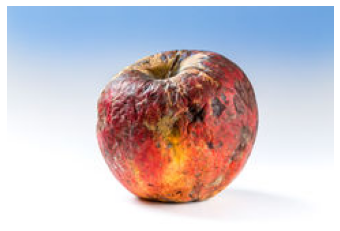

识别结果： rottenapples


In [3]:
mymodel = MyModel()

# 输入图片
path = '../新鲜水果分类/testImg/apple.jpg'
input_image = Image.open(path)
plt.imshow(input_image)
plt.axis('off')
plt.show()
# 将输入的图片转成tensor
input_image = torchvision.transforms.Resize((100, 100))(input_image)
input_image = torchvision.transforms.ToTensor()(input_image)
# 改变图片维度
input_image = torch.unsqueeze(input_image, 0)
# 加载模型
save_dict = torch.load('fresh_fruits.pth')
mymodel.load_state_dict(save_dict)
# 输入图片到模型
output = mymodel(input_image)
# 取出最大预测值
_, pred = torch.max(output, 1)

name = ['freshapples', 'freshbanana', 'freshoranges', 
        'rottenapples', 'rottenbanana', 'rottenoranges']
print('识别结果：', name[pred.item()])